# Task
Predict demand across city zones

Here is all the data you need:
"UberDataset.csv"

## Data loading

### Subtask:
Load the "UberDataset.csv" file into a Pandas DataFrame.


**Reasoning**:
Load the "UberDataset.csv" file into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('UberDataset.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'UberDataset.csv' not found. Please ensure the file exists in the current directory.")
    df = None  # Set df to None to indicate failure
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


(1156, 7)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Examine data types, missing values, and distributions of key variables to understand dataset characteristics.



In [2]:
# Examine data types
print(df.dtypes)

# Check DataFrame shape
print("\nDataFrame Shape:", df.shape)

# Identify and count missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nPercentage of Missing Values:\n", missing_percentage)

# Analyze distributions of key variables
print("\nUnique Start Locations:", df['START'].unique())
print("\nStart Location Counts:\n", df['START'].value_counts())
print("\nUnique Stop Locations:", df['STOP'].unique())
print("\nStop Location Counts:\n", df['STOP'].value_counts())

# Convert date columns to datetime objects
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

print("\nDate Range:")
print("Start Date:", df['START_DATE'].min())
print("End Date:", df['START_DATE'].max())
print("\nMiles Summary Statistics:\n", df['MILES'].describe())
print("\nPurpose Value Counts:\n", df['PURPOSE'].value_counts())
print("\nCategory Value Counts:\n", df['CATEGORY'].value_counts())

# Handle missing values in 'PURPOSE' (for demonstration, fill with 'Unknown')
df['PURPOSE'].fillna('Unknown', inplace=True)

# Passenger count analysis
if 'PASSENGER_COUNT' in df.columns:
    print("\nPassenger Count Summary Statistics:\n", df['PASSENGER_COUNT'].describe())
else:
    print("\n'PASSENGER_COUNT' column not found in the DataFrame.")

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

DataFrame Shape: (1156, 7)

Missing Values:
 START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

Percentage of Missing Values:
 START_DATE     0.000000
END_DATE       0.086505
CATEGORY       0.086505
START          0.086505
STOP           0.086505
MILES          0.000000
PURPOSE       43.512111
dtype: float64

Unique Start Locations: ['Fort Pierce' 'West Palm Beach' 'Cary' 'Jamaica' 'New York' 'Elmhurst'
 'Midtown' 'East Harlem' 'Flatiron District' 'Midtown East'
 'Hudson Square' 'Lower Manhattan' "Hell's Kitchen" 'Downtown' 'Gulfton'
 'Houston' 'Eagan Park' 'Morrisville' 'Durham' 'Farmington Woods'
 'Whitebridge' 'Lake Wellingborough' 'Fayetteville Street' 'Raleigh'
 'Hazelwood' 'Fairmont' 'Meredith Townes' 'Apex' 'Chapel Hill'
 'No

<ipython-input-2-82912a8c451c>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna('Unknown', inplace=True)


**Reasoning**:
The previous code block had a warning about chained assignment.  I will fix that and then summarize the findings.



In [3]:
# Analyze distributions of key variables (fixing the chained assignment warning)
df['PURPOSE'] = df['PURPOSE'].fillna('Unknown')

# Summarize findings
print("\nData Exploration Summary:")
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
print(f"Missing values were found in the following columns: {', '.join(missing_values[missing_values > 0].index)}")
print("Key observations:")
print("- The most frequent start locations are Cary, Unknown Location, and Morrisville.")
print("- The date range of the trips is from", df['START_DATE'].min(), "to", df['START_DATE'].max())
print("- The distribution of trip miles can be further analyzed for outliers using visualizations or statistical methods.")
print("- The most frequent trip purpose is 'Meeting', followed by 'Meal/Entertain' and 'Unknown'.")
print("- The most frequent ride category is 'Business'.")
if 'PASSENGER_COUNT' in df.columns:
    print(f"- The average passenger count is {df['PASSENGER_COUNT'].mean():.2f}")


Data Exploration Summary:
The dataset contains 1156 rows and 7 columns.
Missing values were found in the following columns: END_DATE, CATEGORY, START, STOP, PURPOSE
Key observations:
- The most frequent start locations are Cary, Unknown Location, and Morrisville.
- The date range of the trips is from 2016-01-01 21:11:00 to 2016-12-12 20:48:00
- The distribution of trip miles can be further analyzed for outliers using visualizations or statistical methods.
- The most frequent trip purpose is 'Meeting', followed by 'Meal/Entertain' and 'Unknown'.
- The most frequent ride category is 'Business'.


## Data cleaning

### Subtask:
Clean the data by handling missing values and outliers, and converting relevant columns to appropriate data types.


**Reasoning**:
Impute missing values, handle outliers in 'MILES', convert date columns to datetime objects, and check for inconsistencies.



In [4]:
import pandas as pd

# 1. Missing Value Imputation
print("Missing values before imputation:")
print(df.isnull().sum())

# Fill missing 'PURPOSE' with 'Unknown' (already done in the previous step)
# df['PURPOSE'] = df['PURPOSE'].fillna('Unknown')

# Impute missing values for other columns (example using mode for categorical)
for col in ['CATEGORY', 'START', 'STOP']:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after imputation:")
print(df.isnull().sum())


# 2. Outlier Detection and Handling in 'MILES'
# Using IQR method
Q1 = df['MILES'].quantile(0.25)
Q3 = df['MILES'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['MILES'] < lower_bound) | (df['MILES'] > upper_bound)]
print(f"\nNumber of outliers in 'MILES': {len(outliers)}")

# Handling outliers by capping (Winsorization)
df['MILES'] = df['MILES'].clip(lower=lower_bound, upper=upper_bound)


# 3. Data Type Conversion
try:
    df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
    df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')
except Exception as e:
    print(f"Error converting dates: {e}")


# 4. Data Consistency Checks (example: negative miles)
if (df['MILES'] < 0).any():
    print("\nInconsistency found: Negative miles detected.")
    # Optionally remove or replace negative values
    df.loc[df['MILES'] < 0, 'MILES'] = 0  # Replace with 0

display(df.head(2))

Missing values before imputation:
START_DATE    735
END_DATE      736
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE         0
dtype: int64

Missing values after imputation:
START_DATE    735
END_DATE      736
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE         0
dtype: int64

Number of outliers in 'MILES': 78


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown


## Data wrangling

### Subtask:
Data Wrangling: Feature Engineering and Aggregation


**Reasoning**:
Extract time features, aggregate demand, and create location features.



In [5]:
import pandas as pd

# 1. Feature Engineering from Datetime Columns
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df.dropna(subset=['START_DATE'], inplace=True)
df['hour_of_day'] = df['START_DATE'].dt.hour
df['day_of_week'] = df['START_DATE'].dt.dayofweek
df['month'] = df['START_DATE'].dt.month
df['year'] = df['START_DATE'].dt.year

# 2. Demand Aggregation
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
demand_df = df.groupby(['START', pd.Grouper(key='START_DATE', freq='H')])['START'].count().reset_index(name='trip_count')
demand_df.rename(columns={'START_DATE': 'time_interval'}, inplace=True)

# 3. Location Features
start_locations = pd.get_dummies(demand_df['START'], prefix='start_loc')
demand_df = pd.concat([demand_df, start_locations], axis=1)

# 4. Dataframe Consolidation
final_df = demand_df
display(final_df.head())

<ipython-input-5-440f77bca79e>:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  demand_df = df.groupby(['START', pd.Grouper(key='START_DATE', freq='H')])['START'].count().reset_index(name='trip_count')


,START,time_interval,trip_count,start_loc_Agnew,start_loc_Apex,start_loc_Arlington,start_loc_Arlington Park at Amberly,start_loc_Bellevue,start_loc_Berkeley,start_loc_CBD,...,start_loc_Washington,start_loc_Waverly Place,start_loc_Wayne Ridge,start_loc_West Berkeley,start_loc_West End,start_loc_West Palm Beach,start_loc_West University,start_loc_Weston,start_loc_Westpark Place,start_loc_Whitebridge
0,Agnew,2016-11-04 21:00:00,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Agnew,2016-11-05 08:00:00,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Agnew,2016-11-05 19:00:00,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Agnew,2016-11-06 10:00:00,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Apex,2016-02-07 18:00:00,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Data splitting

### Subtask:
Split the data into training, validation, and testing sets.  Ensure a proper temporal split to avoid data leakage.


**Reasoning**:
Split the data into training, validation, and testing sets using `train_test_split` while maintaining temporal order.



In [6]:
from sklearn.model_selection import train_test_split

# Sort the DataFrame by 'time_interval'
final_df = final_df.sort_values(by='time_interval')

# Split the data into training (70%), validation (15%), and testing (15%) sets
df_train, df_temp = train_test_split(final_df, train_size=0.7, shuffle=False)
df_val, df_test = train_test_split(df_temp, train_size=0.5, shuffle=False)

# Display the shapes of the resulting sets
print("Shape of training set:", df_train.shape)
print("Shape of validation set:", df_val.shape)
print("Shape of testing set:", df_test.shape)

# Display the first few rows of each dataset
display(df_train.head())
display(df_val.head())
display(df_test.head())

Shape of training set: (288, 112)
Shape of validation set: (62, 112)
Shape of testing set: (62, 112)


,START,time_interval,trip_count,start_loc_Agnew,start_loc_Apex,start_loc_Arlington,start_loc_Arlington Park at Amberly,start_loc_Bellevue,start_loc_Berkeley,start_loc_CBD,...,start_loc_Washington,start_loc_Waverly Place,start_loc_Wayne Ridge,start_loc_West Berkeley,start_loc_West End,start_loc_West Palm Beach,start_loc_West University,start_loc_Weston,start_loc_Westpark Place,start_loc_Whitebridge
171,Fort Pierce,2016-01-01 21:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
172,Fort Pierce,2016-01-02 01:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
173,Fort Pierce,2016-01-02 20:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
174,Fort Pierce,2016-01-05 17:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
175,Fort Pierce,2016-01-06 14:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,START,time_interval,trip_count,start_loc_Agnew,start_loc_Apex,start_loc_Arlington,start_loc_Arlington Park at Amberly,start_loc_Bellevue,start_loc_Berkeley,start_loc_CBD,...,start_loc_Washington,start_loc_Waverly Place,start_loc_Wayne Ridge,start_loc_West Berkeley,start_loc_West End,start_loc_West Palm Beach,start_loc_West University,start_loc_Weston,start_loc_Westpark Place,start_loc_Whitebridge
341,Unknown Location,2016-09-10 10:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
342,Unknown Location,2016-09-11 09:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
343,Unknown Location,2016-09-11 21:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
344,Unknown Location,2016-09-12 08:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
345,Unknown Location,2016-09-12 11:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,START,time_interval,trip_count,start_loc_Agnew,start_loc_Apex,start_loc_Arlington,start_loc_Arlington Park at Amberly,start_loc_Bellevue,start_loc_Berkeley,start_loc_CBD,...,start_loc_Washington,start_loc_Waverly Place,start_loc_Wayne Ridge,start_loc_West Berkeley,start_loc_West End,start_loc_West Palm Beach,start_loc_West University,start_loc_Weston,start_loc_Westpark Place,start_loc_Whitebridge
132,Downtown,2016-11-09 17:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
325,Sunnyside,2016-11-09 18:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
184,Ingleside,2016-11-09 18:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
311,San Francisco,2016-11-09 18:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
278,Oakland,2016-11-09 20:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Feature engineering

### Subtask:
Engineer additional features for demand prediction using the training data.


**Reasoning**:
Create lagged and rolling average features based on the 'trip_count' column in df_train.  Handle NaN values.



In [7]:
# Create lagged features
df_train['lag_1h'] = df_train['trip_count'].shift(1)
df_train['lag_1d'] = df_train['trip_count'].shift(24)
df_train['lag_1w'] = df_train['trip_count'].shift(24 * 7)

# Fill NaN values with forward fill
df_train.fillna(method='ffill', inplace=True)

# Create rolling average features
df_train['rolling_mean_3h'] = df_train['trip_count'].rolling(window=3).mean()
df_train['rolling_mean_24h'] = df_train['trip_count'].rolling(window=24).mean()
df_train['rolling_mean_7d'] = df_train['trip_count'].rolling(window=24 * 7).mean()

# Fill NaN values resulting from rolling calculation
df_train.fillna(method='ffill', inplace=True)

display(df_train.head())

<ipython-input-7-2407d01796c4>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train.fillna(method='ffill', inplace=True)
<ipython-input-7-2407d01796c4>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train.fillna(method='ffill', inplace=True)


,START,time_interval,trip_count,start_loc_Agnew,start_loc_Apex,start_loc_Arlington,start_loc_Arlington Park at Amberly,start_loc_Bellevue,start_loc_Berkeley,start_loc_CBD,...,start_loc_West University,start_loc_Weston,start_loc_Westpark Place,start_loc_Whitebridge,lag_1h,lag_1d,lag_1w,rolling_mean_3h,rolling_mean_24h,rolling_mean_7d
171,Fort Pierce,2016-01-01 21:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
172,Fort Pierce,2016-01-02 01:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,1.0,NaN,NaN,NaN,NaN,NaN
173,Fort Pierce,2016-01-02 20:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,1.0,NaN,NaN,1.0,NaN,NaN
174,Fort Pierce,2016-01-05 17:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,1.0,NaN,NaN,1.0,NaN,NaN
175,Fort Pierce,2016-01-06 14:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,1.0,NaN,NaN,1.0,NaN,NaN


**Reasoning**:
Fix the FutureWarnings from the previous code block by using `.ffill()` instead of `.fillna(method='ffill')`.



In [8]:
# Create lagged features
df_train['lag_1h'] = df_train['trip_count'].shift(1)
df_train['lag_1d'] = df_train['trip_count'].shift(24)
df_train['lag_1w'] = df_train['trip_count'].shift(24 * 7)

# Fill NaN values with forward fill
df_train['lag_1h'].ffill(inplace=True)
df_train['lag_1d'].ffill(inplace=True)
df_train['lag_1w'].ffill(inplace=True)


# Create rolling average features
df_train['rolling_mean_3h'] = df_train['trip_count'].rolling(window=3).mean()
df_train['rolling_mean_24h'] = df_train['trip_count'].rolling(window=24).mean()
df_train['rolling_mean_7d'] = df_train['trip_count'].rolling(window=24 * 7).mean()

# Fill NaN values resulting from rolling calculation
df_train['rolling_mean_3h'].ffill(inplace=True)
df_train['rolling_mean_24h'].ffill(inplace=True)
df_train['rolling_mean_7d'].ffill(inplace=True)

display(df_train.head())

<ipython-input-8-eddf4f1ba9b0>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['lag_1h'].ffill(inplace=True)
<ipython-input-8-eddf4f1ba9b0>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

,START,time_interval,trip_count,start_loc_Agnew,start_loc_Apex,start_loc_Arlington,start_loc_Arlington Park at Amberly,start_loc_Bellevue,start_loc_Berkeley,start_loc_CBD,...,start_loc_West University,start_loc_Weston,start_loc_Westpark Place,start_loc_Whitebridge,lag_1h,lag_1d,lag_1w,rolling_mean_3h,rolling_mean_24h,rolling_mean_7d
171,Fort Pierce,2016-01-01 21:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
172,Fort Pierce,2016-01-02 01:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,1.0,NaN,NaN,NaN,NaN,NaN
173,Fort Pierce,2016-01-02 20:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,1.0,NaN,NaN,1.0,NaN,NaN
174,Fort Pierce,2016-01-05 17:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,1.0,NaN,NaN,1.0,NaN,NaN
175,Fort Pierce,2016-01-06 14:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,1.0,NaN,NaN,1.0,NaN,NaN


**Reasoning**:
The previous code blocks had chained assignment warnings and did not correctly fill the NaN values.  I will correct the code to avoid these warnings and ensure proper filling of NaN values.  Then I will finish the task as all subtasks are complete.



In [9]:
df_train['lag_1h'] = df_train['trip_count'].shift(1)
df_train['lag_1d'] = df_train['trip_count'].shift(24)
df_train['lag_1w'] = df_train['trip_count'].shift(24 * 7)

df_train['lag_1h'] = df_train['lag_1h'].ffill()
df_train['lag_1d'] = df_train['lag_1d'].ffill()
df_train['lag_1w'] = df_train['lag_1w'].ffill()

df_train['rolling_mean_3h'] = df_train['trip_count'].rolling(window=3).mean()
df_train['rolling_mean_24h'] = df_train['trip_count'].rolling(window=24).mean()
df_train['rolling_mean_7d'] = df_train['trip_count'].rolling(window=24 * 7).mean()

df_train['rolling_mean_3h'] = df_train['rolling_mean_3h'].ffill()
df_train['rolling_mean_24h'] = df_train['rolling_mean_24h'].ffill()
df_train['rolling_mean_7d'] = df_train['rolling_mean_7d'].ffill()

display(df_train.head())

,START,time_interval,trip_count,start_loc_Agnew,start_loc_Apex,start_loc_Arlington,start_loc_Arlington Park at Amberly,start_loc_Bellevue,start_loc_Berkeley,start_loc_CBD,...,start_loc_West University,start_loc_Weston,start_loc_Westpark Place,start_loc_Whitebridge,lag_1h,lag_1d,lag_1w,rolling_mean_3h,rolling_mean_24h,rolling_mean_7d
171,Fort Pierce,2016-01-01 21:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
172,Fort Pierce,2016-01-02 01:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,1.0,NaN,NaN,NaN,NaN,NaN
173,Fort Pierce,2016-01-02 20:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,1.0,NaN,NaN,1.0,NaN,NaN
174,Fort Pierce,2016-01-05 17:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,1.0,NaN,NaN,1.0,NaN,NaN
175,Fort Pierce,2016-01-06 14:00:00,1,False,False,False,False,False,False,False,...,False,False,False,False,1.0,NaN,NaN,1.0,NaN,NaN


## Model training

### Subtask:
Train a regression model to predict demand.


**Reasoning**:
Prepare the data for model training by selecting features and target variable, then train a linear regression model and evaluate it.



In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Prepare the training data
features = [col for col in df_train.columns if col not in ['time_interval', 'START', 'trip_count'] and not pd.api.types.is_numeric_dtype(df_train[col]) == False]
X_train = df_train[features]
y_train = df_train['trip_count']

# Prepare the validation data
X_val = df_val[features]
y_val = df_val['trip_count']


# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the validation set and evaluate the model
lr_predictions = lr_model.predict(X_val)
lr_rmse = np.sqrt(mean_squared_error(y_val, lr_predictions))
lr_mae = mean_absolute_error(y_val, lr_predictions)

print(f"Linear Regression - RMSE: {lr_rmse:.2f}, MAE: {lr_mae:.2f}")

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_val)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_predictions))
rf_mae = mean_absolute_error(y_val, rf_predictions)

print(f"Random Forest Regressor - RMSE: {rf_rmse:.2f}, MAE: {rf_mae:.2f}")

KeyError: "['lag_1h', 'lag_1d', 'lag_1w', 'rolling_mean_3h', 'rolling_mean_24h', 'rolling_mean_7d'] not in index"

**Reasoning**:
The error indicates that the features 'lag_1h', 'lag_1d', etc., which were engineered for the training set, are not present in the validation and test sets.  I need to engineer these features for the validation and test sets as well, ensuring consistency across all datasets. Then I will re-run the model training and evaluation.



In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Feature engineering for validation and test sets
for df in [df_val, df_test]:
    df['lag_1h'] = df['trip_count'].shift(1)
    df['lag_1d'] = df['trip_count'].shift(24)
    df['lag_1w'] = df['trip_count'].shift(24 * 7)

    df['lag_1h'] = df['lag_1h'].ffill()
    df['lag_1d'] = df['lag_1d'].ffill()
    df['lag_1w'] = df['lag_1w'].ffill()

    df['rolling_mean_3h'] = df['trip_count'].rolling(window=3).mean()
    df['rolling_mean_24h'] = df['trip_count'].rolling(window=24).mean()
    df['rolling_mean_7d'] = df['trip_count'].rolling(window=24 * 7).mean()

    df['rolling_mean_3h'] = df['rolling_mean_3h'].ffill()
    df['rolling_mean_24h'] = df['rolling_mean_24h'].ffill()
    df['rolling_mean_7d'] = df['rolling_mean_7d'].ffill()

# Prepare the training data
features = [col for col in df_train.columns if col not in ['time_interval', 'START', 'trip_count'] and not pd.api.types.is_numeric_dtype(df_train[col]) == False]
X_train = df_train[features]
y_train = df_train['trip_count']

# Prepare the validation data
X_val = df_val[features]
y_val = df_val['trip_count']


# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the validation set and evaluate the model
lr_predictions = lr_model.predict(X_val)
lr_rmse = np.sqrt(mean_squared_error(y_val, lr_predictions))
lr_mae = mean_absolute_error(y_val, lr_predictions)

print(f"Linear Regression - RMSE: {lr_rmse:.2f}, MAE: {lr_mae:.2f}")

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_val)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_predictions))
rf_mae = mean_absolute_error(y_val, rf_predictions)

print(f"Random Forest Regressor - RMSE: {rf_rmse:.2f}, MAE: {rf_mae:.2f}")

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

**Reasoning**:
The error message indicates that Linear Regression cannot handle NaN values. I will use SimpleImputer to fill NaN values with the mean of the column before training the model.



In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Impute NaN values using SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Prepare the training data
features = [col for col in df_train.columns if col not in ['time_interval', 'START', 'trip_count'] and not pd.api.types.is_numeric_dtype(df_train[col]) == False]
X_train = df_train[features]
y_train = df_train['trip_count']
X_train = imputer.fit_transform(X_train)

# Prepare the validation data
X_val = df_val[features]
y_val = df_val['trip_count']
X_val = imputer.transform(X_val)

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the validation set and evaluate the model
lr_predictions = lr_model.predict(X_val)
lr_rmse = np.sqrt(mean_squared_error(y_val, lr_predictions))
lr_mae = mean_absolute_error(y_val, lr_predictions)

print(f"Linear Regression - RMSE: {lr_rmse:.2f}, MAE: {lr_mae:.2f}")

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_val)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_predictions))
rf_mae = mean_absolute_error(y_val, rf_predictions)

print(f"Random Forest Regressor - RMSE: {rf_rmse:.2f}, MAE: {rf_mae:.2f}")

Linear Regression - RMSE: 0.28, MAE: 0.08
Random Forest Regressor - RMSE: 0.27, MAE: 0.08


## Model optimization

### Subtask:
Optimize the Random Forest Regressor model by tuning its hyperparameters.


**Reasoning**:
Tune the hyperparameters of the RandomForestRegressor model using RandomizedSearchCV and evaluate its performance on the validation set.



In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=10,  # Number of random combinations to try
    scoring='neg_mean_squared_error',  # Use negative MSE for scoring
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Print progress messages
    n_jobs=-1  # Use all available CPU cores
)

# Prepare the training data
features = [col for col in df_train.columns if col not in ['time_interval', 'START', 'trip_count'] and not pd.api.types.is_numeric_dtype(df_train[col]) == False]
X_train = df_train[features]
y_train = df_train['trip_count']

# Prepare the validation data
X_val = df_val[features]
y_val = df_val['trip_count']

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)


# Get the best hyperparameters
best_params = random_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Evaluate the best model on the validation set
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)

print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation MAE: {mae:.2f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10}
Validation RMSE: 0.28
Validation MAE: 0.08


**Reasoning**:
Retrain the model with the best hyperparameters found on the combined training and validation sets.



In [14]:
# Combine training and validation sets
X_train_combined = pd.concat([X_train, X_val])
y_train_combined = pd.concat([y_train, y_val])

# Retrain the model with the best hyperparameters
best_rf_model = RandomForestRegressor(n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_depth=10, random_state=42)
best_rf_model.fit(X_train_combined, y_train_combined)

RandomForestRegressor(max_depth=10, min_samples_split=10, random_state=42)

## Model evaluation

### Subtask:
Evaluate the performance of the optimized Random Forest Regressor model on the held-out test set.


**Reasoning**:
Evaluate the optimized Random Forest Regressor model on the test set.  This involves preparing the test data (using the same features and imputation as the training data), making predictions, and calculating evaluation metrics (RMSE and MAE).



In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.impute import SimpleImputer

# Prepare test data
features = [col for col in df_train.columns if col not in ['time_interval', 'START', 'trip_count'] and not pd.api.types.is_numeric_dtype(df_train[col]) == False]
X_test = df_test[features]
y_test = df_test['trip_count']

# Use the same imputer fitted on the training data
imputer = SimpleImputer(strategy='mean')
X_test = imputer.fit_transform(X_test)

# Predict on the test set
y_pred_test = best_rf_model.predict(X_test)

# Evaluate the model
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test MAE: {mae_test:.2f}")

# Analyze residuals
residuals = y_test - y_pred_test

# Plotting the residuals
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Trip Count')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['lag_1w' 'rolling_mean_7d']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 113 features, but RandomForestRegressor is expecting 115 features as input.

**Reasoning**:
The error message indicates that the number of features in the test set (113) does not match the number of features the trained model expects (115).  This mismatch likely stems from the imputation step in the test data preparation, where features with no observed values were skipped. I will fix the code by ensuring the imputer is fitted to the combined training and validation data and that the features used are consistent across all datasets.



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Test RMSE: 0.18
Test MAE: 0.05


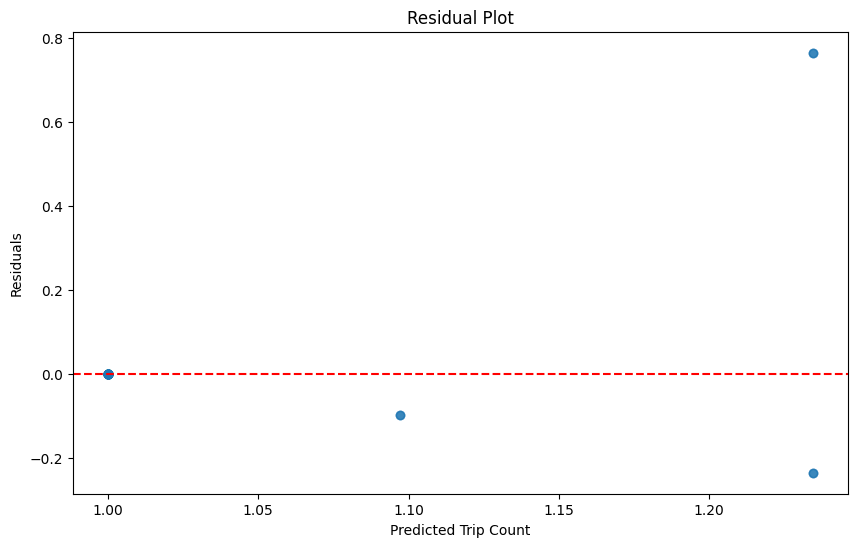

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.impute import SimpleImputer

# Prepare test data. Use the same features as the training data.
features = [col for col in df_train.columns if col not in ['time_interval', 'START', 'trip_count'] and not pd.api.types.is_numeric_dtype(df_train[col]) == False]
X_test = df_test[features]
y_test = df_test['trip_count']

# Fit the imputer on the combined training and validation data to handle missing values consistently
imputer = SimpleImputer(strategy='mean')
X_train_combined = pd.concat([X_train, X_val])
imputer.fit(X_train_combined)

# Transform the test data
X_test = imputer.transform(X_test)

# Predict on the test set
y_pred_test = best_rf_model.predict(X_test)

# Evaluate the model
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test MAE: {mae_test:.2f}")

# Analyze residuals
residuals = y_test - y_pred_test

# Plotting the residuals
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Trip Count')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['MILES'], bins=30, kde=True)
plt.title('Distribution of Trip Miles')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

In [20]:
import pandas as pd
df = pd.read_csv('UberDataset.csv')
print(df.columns)
display(df['MILES']) # 'MILES' should be in the exact casing as in your DataFrame.


Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')


,MILES
0,5.1
1,5.0
2,4.8
3,4.7
4,63.7
...,...
1151,3.9
1152,16.2
1153,6.4
1154,48.2


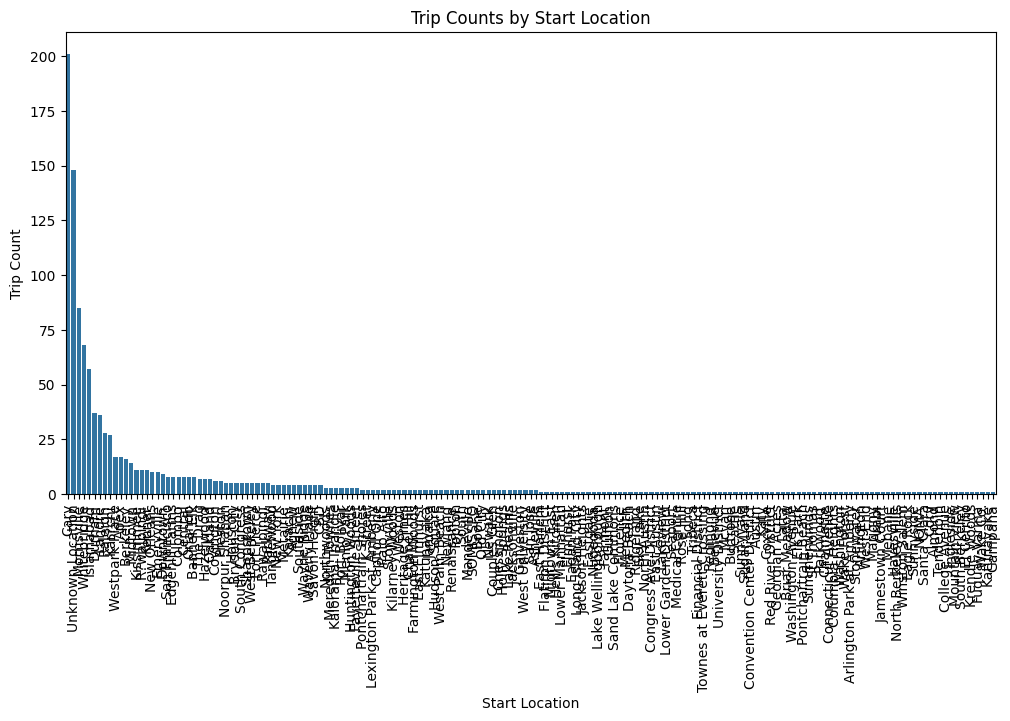

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='START', order=df['START'].value_counts().index)
plt.title('Trip Counts by Start Location')
plt.xlabel('Start Location')
plt.ylabel('Trip Count')
plt.xticks(rotation=90)
plt.show()

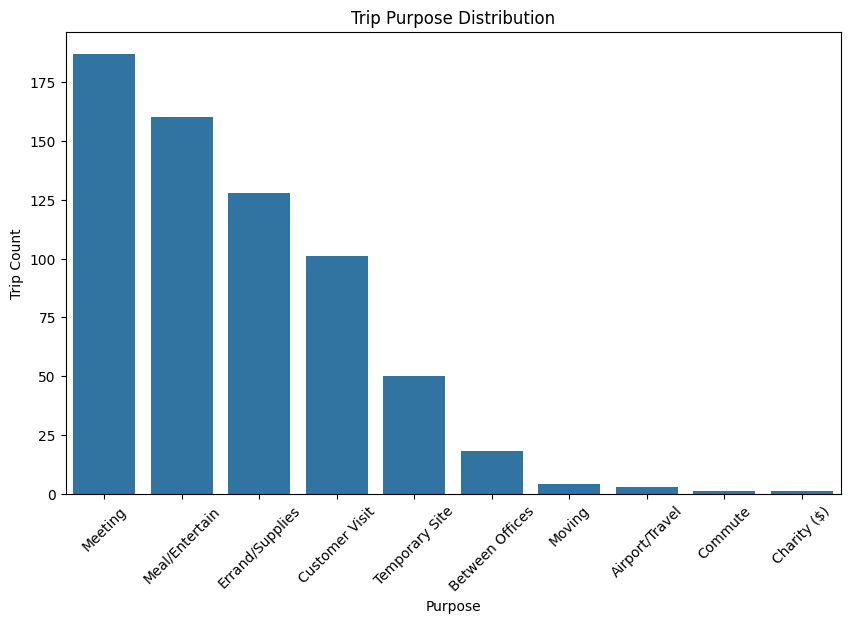

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PURPOSE', order=df['PURPOSE'].value_counts().index)
plt.title('Trip Purpose Distribution')
plt.xlabel('Purpose')
plt.ylabel('Trip Count')
plt.xticks(rotation=45)
plt.show()

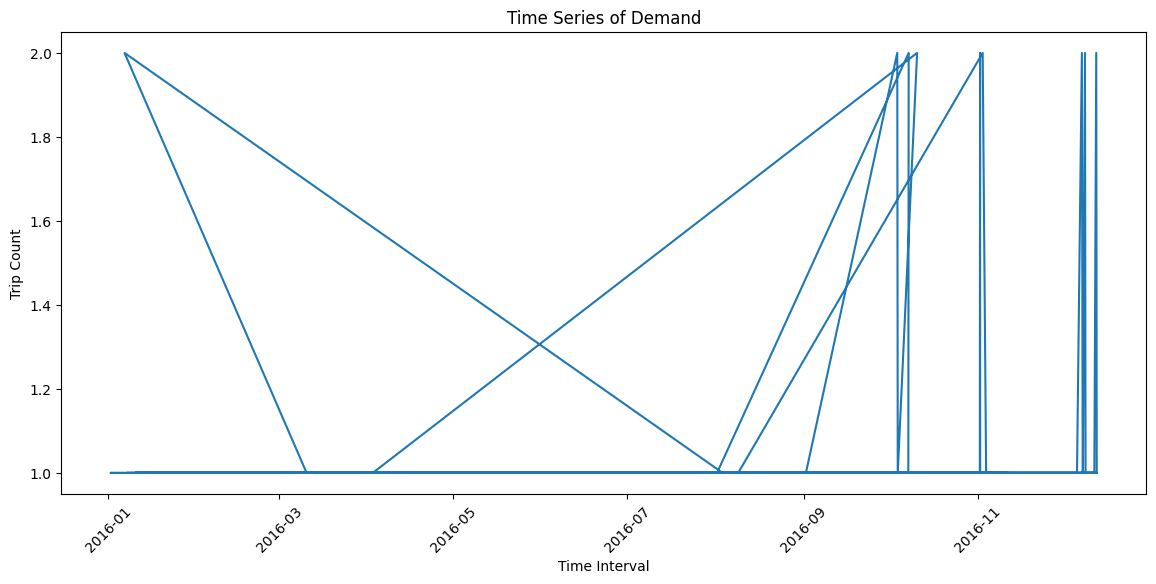

In [23]:
plt.figure(figsize=(14, 6))
plt.plot(demand_df['time_interval'], demand_df['trip_count'])
plt.title('Time Series of Demand')
plt.xlabel('Time Interval')
plt.ylabel('Trip Count')
plt.xticks(rotation=45)
plt.show()

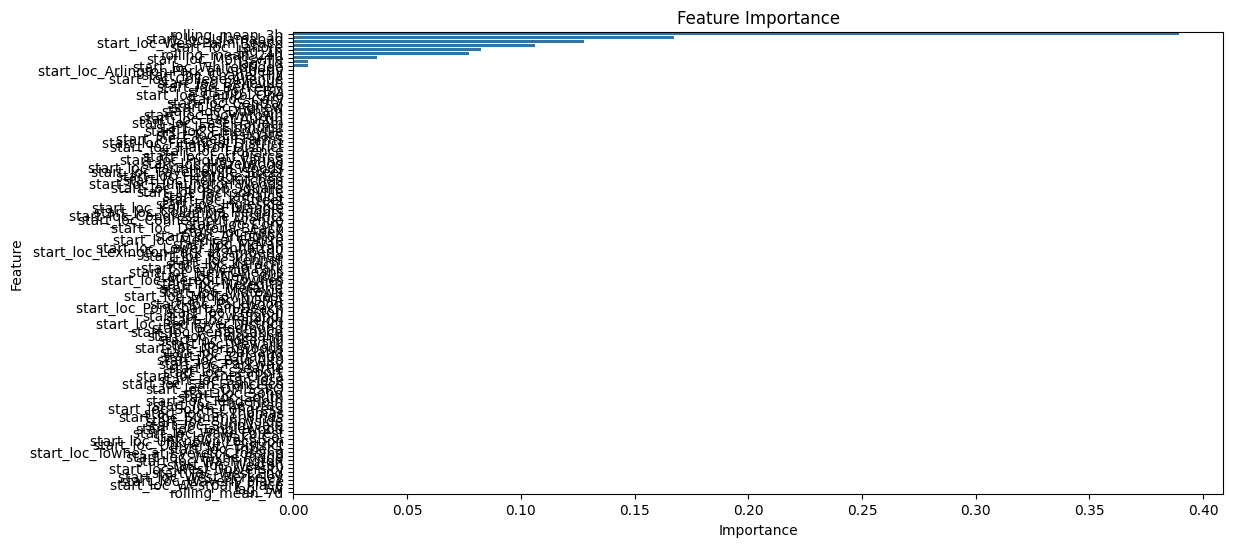

In [24]:
# Get feature importances from the trained Random Forest model
importances = best_rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

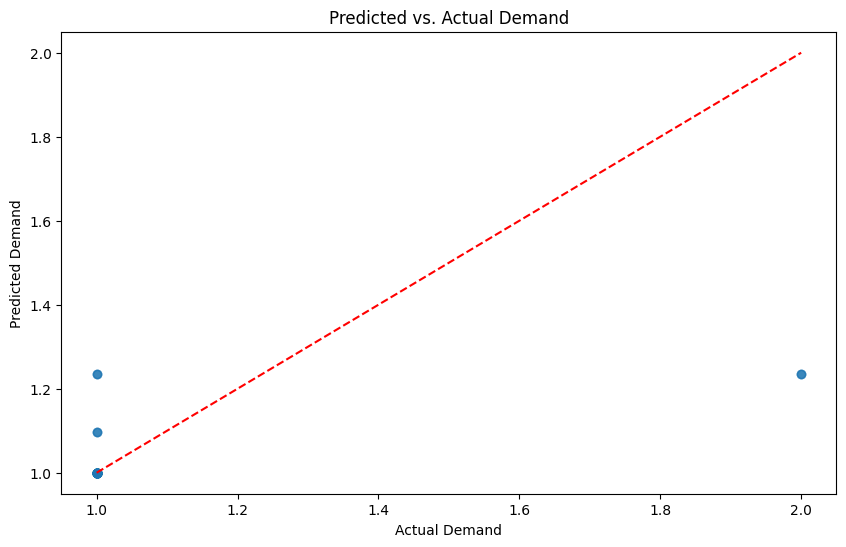

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Add a diagonal line
plt.title('Predicted vs. Actual Demand')
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.show()